# Anime Recommendation 

In [157]:
# Reading Dataset
import numpy as np
import pandas as pd
import math

# Visualization
import plotly.express as px
import plotly.graph_objects as go  # Library for 3D plot visualization
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from wordcloud import WordCloud

### Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

# Data Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Model Training
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf

## Import necessary modules
from tensorflow.keras.layers import Input, Embedding, Dot, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping

# Additional Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns


## Exploratory Data Analysis (EDA)

In [158]:
# Load the datasets
anime_data = pd.read_csv('anime-filtered.csv')
user_data = pd.read_csv('user-filtered.csv')

### Explore the anime dataset

In [159]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Explore the anime dataset
# Display the first few rows of the dataset
print("Anime Dataset:")
anime_data.head()

Anime Dataset:


anime_id                             Name  Score  \
0         1                     Cowboy Bebop   8.78   
1         5  Cowboy Bebop: Tengoku no Tobira   8.39   
2         6                           Trigun   8.24   
3         7               Witch Hunter Robin   7.27   
4         8                   Bouken Ou Beet   6.98   

                                              Genres            English name  \
0    Action, Adventure, Comedy, Drama, Sci-Fi, Space            Cowboy Bebop   
1              Action, Drama, Mystery, Sci-Fi, Space  Cowboy Bebop:The Movie   
2  Action, Sci-Fi, Adventure, Comedy, Drama, Shounen                  Trigun   
3  Action, Mystery, Police, Supernatural, Drama, ...      Witch Hunter Robin   
4          Adventure, Fantasy, Shounen, Supernatural  Beet the Vandel Buster   

                      Japanese name  \
0                         カウボーイビバップ   
1                    カウボーイビバップ 天国の扉   
2                             トライガン   
3  Witch Hunter ROBIN (ウイッチハンターロビン)   
4                            冒険王ビィト   

                                           sypnopsis   Type Episodes  \
0  In the year 2071, humanity has colonized sever...     TV       26   
1  other day, another bounty—such is the life of ...  Movie        1   
2  Vash the Stampede is the man with a $$60,000,0...     TV       26   
3  ches are individuals with special powers like ...     TV       26   
4  It is the dark century and the people are suff...     TV       52   

                          Aired    Premiered  \
0   Apr 3, 1998 to Apr 24, 1999  Spring 1998   
1                   Sep 1, 2001      Unknown   
2   Apr 1, 1998 to Sep 30, 1998  Spring 1998   
3   Jul 2, 2002 to Dec 24, 2002  Summer 2002   
4  Sep 30, 2004 to Sep 29, 2005    Fall 2004   

                                           Producers  \
0                                      Bandai Visual   
1                             Sunrise, Bandai Visual   
2                               Victor Entertainment   
3  TV Tokyo, Bandai Visual, Dentsu, Victor Entert...   
4                                   TV Tokyo, Dentsu   

                              Licensors         Studios    Source  \
0      Funimation, Bandai Entertainment         Sunrise  Original   
1           Sony Pictures Entertainment           Bones  Original   
2  Funimation, Geneon Entertainment USA        Madhouse     Manga   
3      Funimation, Bandai Entertainment         Sunrise  Original   
4                               Unknown  Toei Animation     Manga   

          Duration                          Rating  Ranked  Popularity  \
0  24 min. per ep.  R - 17+ (violence & profanity)    28.0          39   
1    1 hr. 55 min.  R - 17+ (violence & profanity)   159.0         518   
2  24 min. per ep.       PG-13 - Teens 13 or older   266.0         201   
3  25 min. per ep.       PG-13 - Teens 13 or older  2481.0        1467   
4  23 min. per ep.                   PG - Children  3710.0        4369   

   Members  Favorites  Watching  Completed  On-Hold  Dropped  
0  1251960      61971    105808     718161    71513    26678  
1   273145       1174      4143     208333     1935      770  
2   558913      12944     29113     343492    25465    13925  
3    94683        587      4300      46165     5121     5378  
4    13224         18       642       7314      766     1108

In [160]:
# Check the shape of the dataset
print("Shape of Anime Dataset:")
print(anime_data.shape)

Shape of Anime Dataset:
(14952, 25)


In [161]:
# Check the data types of each column
print("Data Types of Anime Dataset:")
print(anime_data.dtypes)

Data Types of Anime Dataset:
anime_id           int64
Name              object
Score            float64
Genres            object
English name      object
Japanese name     object
sypnopsis         object
Type              object
Episodes          object
Aired             object
Premiered         object
Producers         object
Licensors         object
Studios           object
Source            object
Duration          object
Rating            object
Ranked           float64
Popularity         int64
Members            int64
Favorites          int64
Watching           int64
Completed          int64
On-Hold            int64
Dropped            int64
dtype: object


In [162]:
# Check for missing values
print("Missing Values in Anime Dataset:")
print(anime_data.isnull().sum())


Missing Values in Anime Dataset:
anime_id            0
Name                0
Score               0
Genres              0
English name        0
Japanese name       0
sypnopsis        1350
Type                0
Episodes            0
Aired               0
Premiered           0
Producers           0
Licensors           0
Studios             0
Source              0
Duration            0
Rating              0
Ranked           1721
Popularity          0
Members             0
Favorites           0
Watching            0
Completed           0
On-Hold             0
Dropped             0
dtype: int64


### Explore the user dataset

In [163]:
# Display the first few rows of the dataset
print("User Dataset:")
user_data.head()


User Dataset:


user_id  anime_id  rating
0        0        67       9
1        0      6702       7
2        0       242      10
3        0      4898       0
4        0        21      10

In [164]:
# Check the shape of the dataset
print("Shape of User Dataset:")
print(user_data.shape)


Shape of User Dataset:
(109224747, 3)


In [165]:
# Check the data types of each column
print("Data Types of User Dataset:")
print(user_data.dtypes)

Data Types of User Dataset:
user_id     int64
anime_id    int64
rating      int64
dtype: object


In [166]:
# Check for missing values
print("Missing Values in User Dataset:")
print(user_data.isnull().sum())

Missing Values in User Dataset:


user_id     0
anime_id    0
rating      0
dtype: int64


### Data Visualization

#### Anime Scores Distribution

In [167]:
# Extract the average scores
average_scores = anime_data['Score']

# Create a histogram
fig = go.Figure()
fig.add_trace(go.Histogram(x=average_scores, nbinsx=20))

# Update the layout
fig.update_layout(
    title='Distribution of Average Anime Scores',
    xaxis=dict(title='Score'),
    yaxis=dict(title='Frequency'),
)

# Show the plot
fig.show()

# Create a box plot
fig = go.Figure()
fig.add_trace(go.Box(x=average_scores))

# Update the layout
fig.update_layout(
    title='Box Plot of Average Anime Scores',
    yaxis=dict(title='Score'),
)

# Show the plot
fig.show()

#### User Ratings 

In [168]:
# Extract the user ratings
user_ratings = anime_data['Rating']

# Create a bar plot with a colorful palette
fig = px.bar(user_ratings.value_counts(), color=user_ratings.value_counts().index, color_discrete_sequence=px.colors.qualitative.Pastel)

# Update the layout for bar plot
fig.update_layout(
    title='User Ratings',
    xaxis=dict(title='Ratings'),
    yaxis=dict(title='Count')
)

# Show the bar plot
fig.show()

#### Top 10 Anime

In [169]:
# Sort the anime_data DataFrame based on members, score, and favorites
top_members = anime_data.sort_values('Members', ascending=False).head(10)
top_score = anime_data.sort_values('Score', ascending=False).head(10)
top_favorites = anime_data.sort_values('Favorites', ascending=False).head(10)

# Create bar charts for the top 15 anime based on members, score, and favorites
fig_members = px.bar(top_members, x='Name', y='Members',
                     title='Top 10 Anime based on Members',
                     labels={'x': 'Anime', 'y': 'Members'},
                     color='Name', color_discrete_sequence=px.colors.qualitative.Pastel)

fig_score = px.bar(top_score, x='Name', y='Score',
                   title='Top 10 Anime based on Score',
                   labels={'x': 'Anime', 'y': 'Score'},
                   color='Name', color_discrete_sequence=px.colors.qualitative.Pastel)

fig_favorites = px.bar(top_favorites, x='Name', y='Favorites',
                       title='Top 10 Anime based on Favorites',
                       labels={'x': 'Anime', 'y': 'Favorites'},
                       color='Name', color_discrete_sequence=px.colors.qualitative.Pastel)

# Show the bar charts
fig_members.show()
fig_score.show()
fig_favorites.show()


#### Genre Analysis

In [170]:
# Extract the genres
genres = anime_data['Genres'].str.split(',', expand=True).stack().str.strip().value_counts()

# Calculate the percentage of each genre
genre_percentages = genres / genres.sum() * 100

# Create a bar chart for genre frequency
fig_bar = px.bar(x=genres.index, y=genres.values, color=genres.index, color_discrete_sequence=px.colors.qualitative.Pastel)
fig_bar.update_layout(title='Frequency of Anime across Different Genres', xaxis=dict(title='Genre'), yaxis=dict(title='Frequency'))

# Select the top 10 genres
top_10_genres = genres[:10]

# Calculate the percentage of each genre
genre_percentages = top_10_genres / top_10_genres.sum() * 100

# Combine the rest of the genres into a single category
other_genres_count = genres[10:].sum()
genre_percentages['Other'] = other_genres_count / genres.sum() * 100

# Create a pie chart for top 10 genres and other
fig_pie = go.Figure(data=[go.Pie(labels=genre_percentages.index, values=genre_percentages.values, 
                                textinfo='label+percent', hole=0.3, 
                                marker=dict(colors=px.colors.qualitative.Pastel))])
fig_pie.update_layout(title='Percentage of Anime across Top 10 Genres')

# Show the bar chart and pie chart
fig_bar.show()
fig_pie.show()

In [171]:
# Split the genres into separate rows
genre_data = anime_data['Genres'].str.split(', ').explode().reset_index(drop=True)
genre_member_data = pd.DataFrame({'Genre': genre_data})
genre_member_data = genre_member_data.merge(anime_data[['Genres', 'Members']], left_on='Genre', right_on='Genres')
genre_member_data.drop('Genres', axis=1, inplace=True)
genre_member_data.reset_index(drop=True, inplace=True)

# Calculate the total members for each genre
genre_counts = genre_member_data.groupby('Genre')['Members'].sum().sort_values(ascending=False)

# Create a bar chart for genre and member counts
fig = px.bar(x=genre_counts.index, y=genre_counts.values, color=genre_counts.index,
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title='Anime Genre by Member Count',
                  xaxis=dict(title='Genre'), yaxis=dict(title='Member Count'))

# Show the bar chart
fig.show()


In [172]:
# Create a dataframe with genre and score columns
genre_score_data = pd.DataFrame({'Genre': genre_data, 'Score': anime_data['Score']})

# Calculate the average score for each genre
genre_avg_scores = genre_score_data.groupby('Genre')['Score'].mean().sort_values(ascending=False)

# Create a bar chart for the top genres by average score
fig = px.bar(x=genre_avg_scores.index[:20], y=genre_avg_scores.values[:20],
             color=genre_avg_scores.index[:20],
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title='Top Genres by Average Score',
                  xaxis=dict(title='Genre'), yaxis=dict(title='Average Score'))

# Show the bar chart
fig.show()


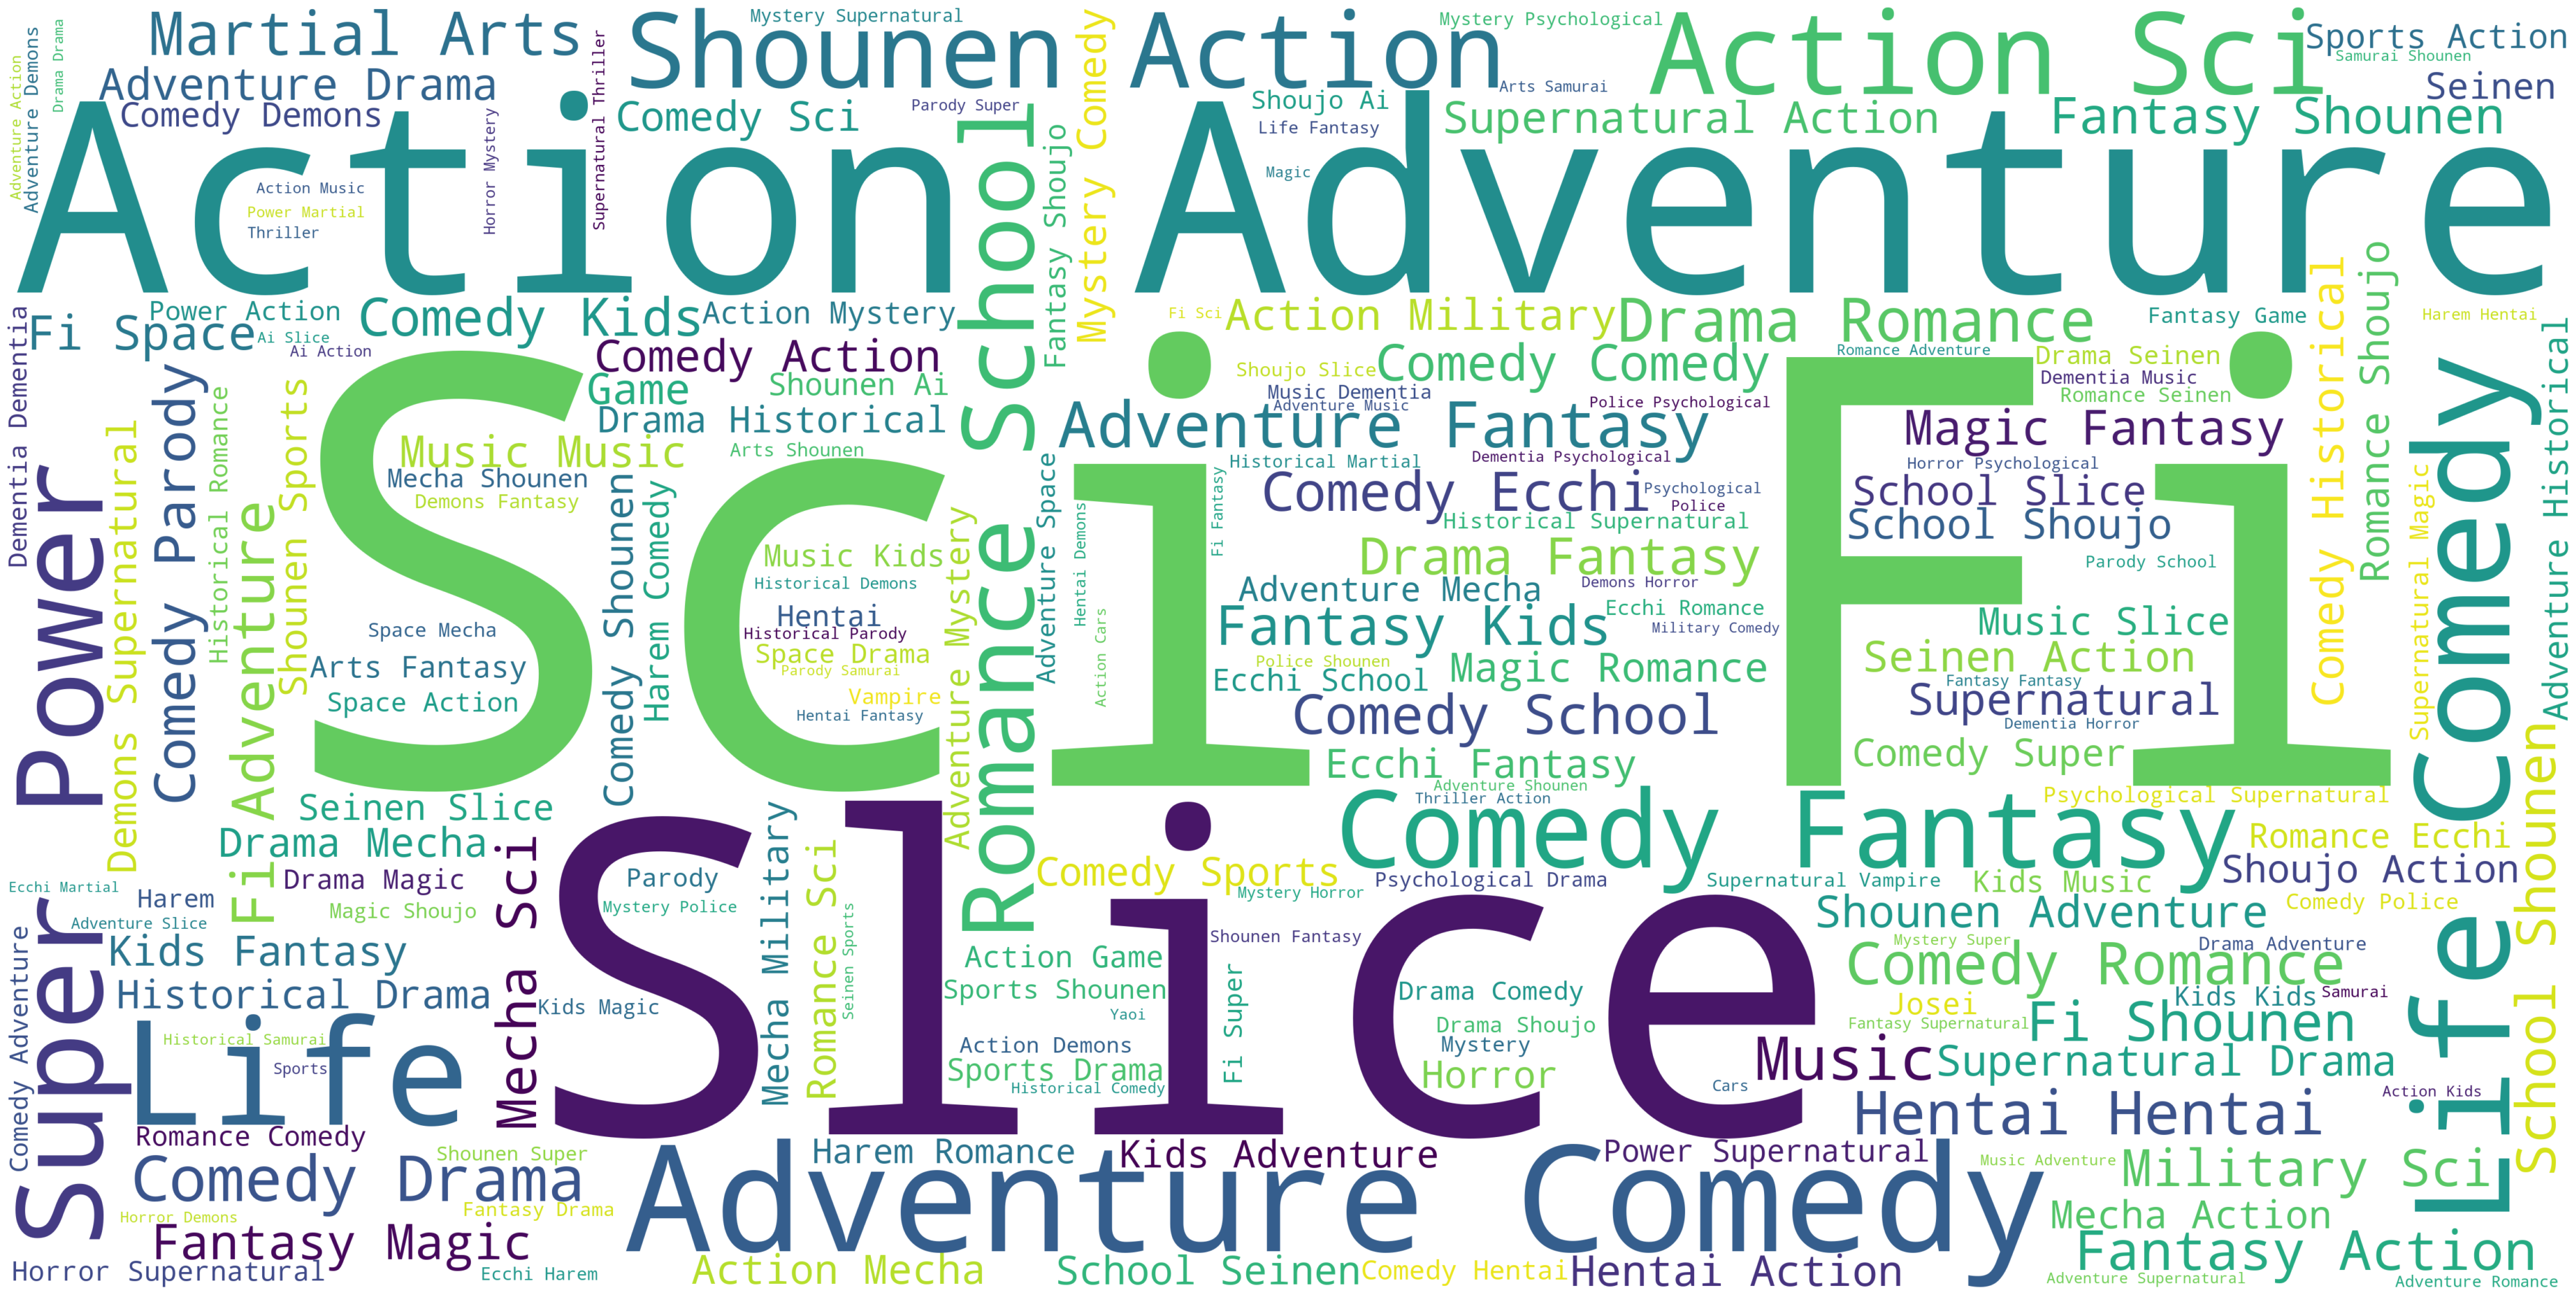

In [173]:
# Concatenate all the separated genres into a single string
genre_text = ' '.join(genre_data)

# Create a WordCloud object
wordcloud = WordCloud(width=4800, height=2400, background_color='white').generate(genre_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(48, 24))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Anime Types

In [174]:
# Extract the anime types
anime_types = anime_data['Type'].value_counts()

# Create a count plot for anime types
fig_count = px.bar(x=anime_types.index, y=anime_types.values, color=anime_types.index, color_discrete_sequence=px.colors.qualitative.Pastel)
fig_count.update_layout(title='Distribution of Anime Types', xaxis=dict(title='Anime Type'), yaxis=dict(title='Count'))

# Create a pie chart for anime types
fig_pie = go.Figure(data=[go.Pie(labels=anime_types.index, values=anime_types.values,
                                textinfo='label+percent', hole=0.3,
                                marker=dict(colors=px.colors.qualitative.Pastel))])
fig_pie.update_layout(title='Distribution of Anime Types')

# Show the count plot and pie chart
fig_count.show()
fig_pie.show()


In [175]:
fig = px.violin(anime_data, x='Type', y='Popularity', 
                labels={'Type':'Anime Type', 'Popularity':'Popularity'},
                title='Distribution of Anime Popularity by Type',
                color='Type')

fig.show()

In [176]:
# Create box plot
fig = px.box(anime_data, x='Type', y='Score',
             labels={'Type':'Anime Type', 'Score':'Score'},
             title='Distribution of Anime Scores by Type',
             color='Type')

fig.show()

#### Release Season 

In [177]:
# Extract the release season
anime_data['Season'] = anime_data['Premiered'].str.split(' ').str[0]

# Count the number of anime in each season
anime_counts = anime_data['Season'].value_counts().sort_index()

# Drop the 'Unknown' season for the bar chart
anime_counts_bar = anime_counts.drop('Unknown')

# Create a bar chart for anime releases by season (excluding 'Unknown')
fig_bar = go.Figure(data=[go.Bar(x=anime_counts_bar.index, y=anime_counts_bar.values,
                                marker=dict(color=px.colors.qualitative.Pastel))])
fig_bar.update_layout(title='Number of Anime Released by Season (excluding "Unknown")',
                      xaxis=dict(title='Season'), yaxis=dict(title='Number of Anime'))

# Create a pie chart for anime releases by season (including 'Unknown')
fig_pie = go.Figure(data=[go.Pie(labels=anime_counts.index, values=anime_counts.values,
                                textinfo='label+percent', hole=0.3,
                                marker=dict(colors=px.colors.qualitative.Pastel))])
fig_pie.update_layout(title='Number of Anime Released by Season (including "Unknown")')

# Show the line chart and bar chart
fig_bar.show()
fig_pie.show()

#### Studio Analysis

In [178]:
studio_counts = anime_data['Studios'].value_counts().sort_values(ascending=False).head(10)

# Remove the "Unknown" studio if present
studio_counts = studio_counts.drop('Unknown', errors='ignore')

# Create a bar chart for the top anime studios (excluding "Unknown")
fig_bar = px.bar(x=studio_counts.index, y=studio_counts.values, color=studio_counts.index,
                 color_discrete_sequence=px.colors.qualitative.Pastel)
fig_bar.update_layout(title='Top 10 Anime Studios by Number of Anime Produced (Excluding "Unknown")',
                      xaxis=dict(title='Studio'), yaxis=dict(title='Number of Anime'))

# Create a treemap for the top anime studios (excluding "Unknown")
fig_treemap = px.treemap(names=studio_counts.index, parents=['Top Studios']*len(studio_counts),
                         values=studio_counts.values, color=studio_counts.index,
                         color_discrete_sequence=px.colors.qualitative.Pastel)
fig_treemap.update_layout(title='Top 10 Anime Studios by Number of Anime Produced (Excluding "Unknown")')

# Add value labels to the treemap
fig_treemap.for_each_trace(lambda t: t.update(text=t.values))
fig_treemap.update_traces(textposition='middle center')

# Show the bar chart and treemap
fig_bar.show()
fig_treemap.show()


In [179]:
# Create a scatter plot
fig = go.Figure(data=go.Scatter(x=anime_data['Members'], y=anime_data['Score'],
                               mode='markers', marker=dict(size=8, opacity=0.5),
                               text=anime_data['Name'],
                               hovertemplate='Name: %{text}<br>Members: %{x}<br>Score: %{y}'))

# Customize the layout
fig.update_layout(title='Anime Popularity vs Score',
                  xaxis=dict(title='Number of Members'),
                  yaxis=dict(title='Score'),
                  hovermode='closest')

# Show the scatter plot
fig.show()


## Data Preprocessing


In [180]:
# Scaling our "rating" column in user_data
scaler = MinMaxScaler()
user_data['scaled_score'] = scaler.fit_transform(user_data[['rating']])

## Encoding user IDs
user_encoder = LabelEncoder()
user_data["user_encoded"] = user_encoder.fit_transform(user_data["user_id"])
num_users = len(user_encoder.classes_)

## Encoding anime IDs
anime_encoder = LabelEncoder()
user_data["anime_encoded"] = anime_encoder.fit_transform(user_data["anime_id"])
num_animes = len(anime_encoder.classes_)

user_data.head()


user_id  anime_id  rating  scaled_score  user_encoded  anime_encoded
0        0        67       9           0.9             0             48
1        0      6702       7           0.7             0           4707
2        0       242      10           1.0             0            218
3        0      4898       0           0.0             0           3873
4        0        21      10           1.0             0             11

In [181]:
# Splitting the data into training and testing sets (X, y)
X = user_data[["user_encoded", "anime_encoded"]].values
y = user_data["scaled_score"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [182]:
# print the shape of the training and testing sets add some text
print('Shape of training sets: ', X_train.shape, y_train.shape)
print('Shape of testing sets: ', X_test.shape, y_test.shape)

Shape of training sets:  (87379797, 2) (87379797,)
Shape of testing sets:  (21844950, 2) (21844950,)


## Model Building


In [183]:
# Prepare input data for model training and evaluation
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

In [184]:
#create a function to build our model Recommendation System
def build_model():
    # Input layers
    user = Input(shape=(1,))
    anime = Input(shape=(1,))

    # Embedding layers
    user_embedding = Embedding(input_dim=num_users, output_dim=50, input_length=1)(user)
    anime_embedding = Embedding(input_dim=num_animes, output_dim=50, input_length=1)(anime)

    # Merge layers
    merged = Dot(name='dot_product', normalize=True, axes=2)([user_embedding, anime_embedding])
    merged = Flatten()(merged)

    # Output layer
    output = Dense(1, activation='sigmoid')(merged)

    # Create model and compile it
    model = Model(inputs=[user, anime], outputs=output)
    model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

    return model

model = build_model()
model.summary()


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_12 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 embedding_12 (Embedding)       (None, 1, 50)        16288500    ['input_11[0][0]']               
                                                                                                  
 embedding_13 (Embedding)       (None, 1, 50)        878100      ['input_12[0][0]']               
                                                                                            

In [185]:
from tensorflow import keras
from tensorflow.keras.callbacks import Callback
K = keras.backend

class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

class LRLog(Callback):
    def __init__(self, verbose=0):
        self.verbose = verbose
        self.lr_history = []
    def __len__(self):
        return len(self.lr_history)
    def on_batch_end(self, batch, logs=None):
        # Log the learning rate for current batch
        rate = K.get_value(self.model.optimizer.lr)
        self.lr_history.append(rate)
    def on_epoch_begin(self, epoch, logs=None):
        if self.verbose:
            lr = K.get_value(self.model.optimizer.lr)
#             print(dir(lr))
            print(f"Current learning rate: {lr:.2e}")

In [134]:
MIN_LR = 1e-5  # minimum learning rate
MAX_LR = 5e-4  # maximum learning rate
BS = 10000  # batch_size
EPOCHS = 10

# Create a callback that saves the model's weights
checkpoint_path = "anime_recommendation.h5"
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                                monitor='val_loss',
                                verbose=1,
                                save_best_only=True,
                                mode='min')

# Create a callback that stops the training when the validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss',
                                patience=3,
                                mode='min')

# Define the number of epochs for ramp-up, sustain, and exponential decay
start_lr = 1e-5
rampup_epochs = 5
sustain_epochs = 0
exp_decay = 0.8

# Define a learning rate function that changes the learning rate over time
def lrfn(epoch):
    if epoch < rampup_epochs:
        return (MAX_LR - start_lr) / rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return MAX_LR
    else:
        return (MAX_LR - MIN_LR) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + MIN_LR
    
# Create a LearningRateScheduler object with the defined learning rate function
lr_callback = LearningRateScheduler(lrfn, verbose=0)

# Calculate the number of iterations
iterations = math.ceil(len(X_train) / BS) * EPOCHS

# Create a OneCycleScheduler object with the given parameters
onecycle_lr = OneCycleScheduler(iterations, start_rate=MIN_LR, max_rate=MAX_LR)

# Create a LRLog object with verbose mode on
lr_log_cb = LRLog(verbose=1)

# define the callbacks
callbacks = [checkpoint, 
             early_stopping, 
             lr_callback, 
             onecycle_lr, 
             lr_log_cb]

## Model Training


In [135]:
# Train the model with the given parameters
history = model.fit(x=X_train_array, 
                    y=y_train, 
                    batch_size=BS, 
                    epochs=EPOCHS, 
                    verbose=1, 
                    callbacks=callbacks, 
                    validation_data=(X_test_array, y_test))

Current learning rate: 1.00e-05
Epoch 1/10
8738/8738 [==============================] - ETA: 0s - loss: 0.1529 - mae: 0.3718 - mse: 0.1529
Epoch 1: val_loss improved from inf to 0.14749, saving model to anime_recommendation.h5
8738/8738 [==============================] - 2086s 237ms/step - loss: 0.1529 - mae: 0.3718 - mse: 0.1529 - val_loss: 0.1475 - val_mae: 0.3643 - val_mse: 0.1475 - lr: 1.1888e-04
Current learning rate: 1.08e-04
Epoch 2/10
8738/8738 [==============================] - ETA: 0s - loss: 0.1092 - mae: 0.2904 - mse: 0.1092
Epoch 2: val_loss improved from 0.14749 to 0.09310, saving model to anime_recommendation.h5
8738/8738 [==============================] - 1941s 222ms/step - loss: 0.1092 - mae: 0.2904 - mse: 0.1092 - val_loss: 0.0931 - val_mae: 0.2518 - val_mse: 0.0931 - lr: 2.2777e-04
Current learning rate: 2.06e-04
Epoch 3/10
8738/8738 [==============================] - ETA: 0s - loss: 0.0863 - mae: 0.2334 - mse: 0.0863
Epoch 3: val_loss improved from 0.09310 to 0.0829

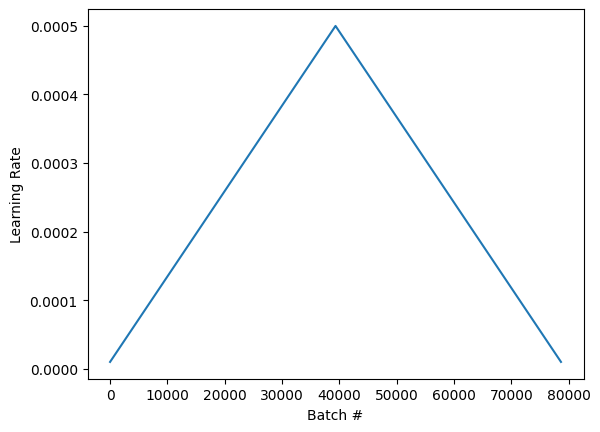

In [136]:
# showing the learning rate over time
plt.plot(lr_log_cb.lr_history)
plt.xlabel('Batch #')
plt.ylabel('Learning Rate')
plt.show()

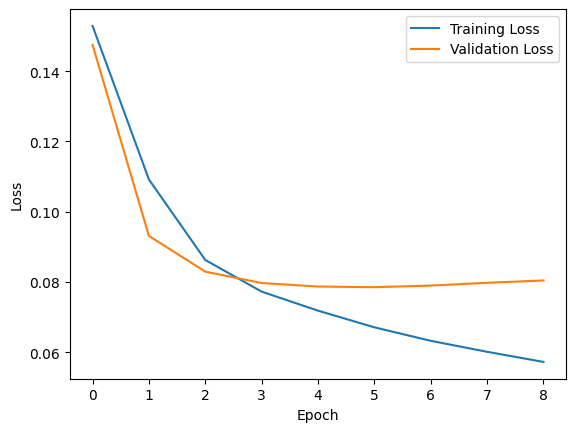

In [137]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [191]:
def load_trained_model():
    # Load the saved model
    model = tf.keras.models.load_model('anime_recommendation.h5')

    # Compile the model
    model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

    return model

In [192]:
# Load the trained model
model = load_trained_model()

In [214]:
def extract_weights(name, model):
    # Get the layer by name from the model
    weight_layer = None
    for layer in model.layers:
        if layer.name == name:
            weight_layer = layer
            break
    
    if weight_layer is None:
        raise ValueError(f"No such layer: {name}. Existing layers are: {[layer.name for layer in model.layers]}")
    
    # Get the weights from the layer
    weights = weight_layer.get_weights()[0]
    
    # Normalize the weights
    weights = weights / np.linalg.norm(weights, axis=1).reshape((-1, 1))
    
    return weights

try:
    # Extract weights for anime embeddings
    anime_weights = extract_weights('embedding_11', model)
    # Extract weights for user embeddings
    user_weights = extract_weights('embedding_10', model)
except ValueError as e:
    print(e)


In [215]:
anime_weights.shape, user_weights.shape

((17562, 50), (325770, 50))

## Generating Recommendations


In [216]:
anime_data_reccom = anime_data.replace('Unknown', np.nan)
anime_data_reccom.sort_values('Name', inplace=True)

In [223]:
def find_similar_animes(name, n=5, return_dist=False, neg=False):
    try:
        # Get the row for the anime with the given name
        anime_row = anime_data_reccom[anime_data_reccom['Name'] == name].iloc[0]
        index = anime_row['anime_id']
        encoded_index = anime_encoder.transform([index])[0]
        weights = anime_weights
        
        # Calculate the cosine similarity between the given anime and all other animes
        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)
        
        n = n + 1            
        
        # Get the n most similar animes
        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('Animes closest to {}'.format(name))

        # Return the n most similar animes as a DataFrame
        if return_dist:
            return dists, closest
        
        SimilarityArr = []

        for close in closest:
            # Get the name, genres, and synopsis for each of the n most similar animes
            decoded_id = anime_encoder.inverse_transform([close])[0]
            anime_frame = anime_data_reccom[anime_data_reccom['anime_id'] == decoded_id]
            
            anime_name = anime_frame['Name'].values[0]
            genre = anime_frame['Genres'].values[0]
            Sypnopsis = anime_frame['sypnopsis'].values[0]
            similarity = dists[close]
            
            # Append the anime information to the SimilarityArr list
            SimilarityArr.append({"Name": anime_name, "Similarity": similarity, "Sypnopsis":Sypnopsis, "Genres": genre})

        # Convert the SimilarityArr list to a DataFrame and sort by similarity
        Frame = pd.DataFrame(SimilarityArr).sort_values(by="Similarity", ascending=False)
        
        # Return the n most similar animes as a DataFrame, excluding the input anime
        return Frame[Frame.Name != name]

    except:
        print('{} not found in Anime list'.format(name))

In [236]:
anime_data_reccom.sort_values('Popularity', ascending=False).head(5)['Name']

14950    Yama no Susume: Next Summit
14946    Tsuki to Laika to Nosferatu
14951                  Scarlet Nexus
14948                   Mieruko-chan
14944                  Kyoukai Senki
Name: Name, dtype: object

In [237]:
find_similar_animes('Yama no Susume: Next Summit', n=5)

Animes closest to Yama no Susume: Next Summit


Name  Similarity  \
4              Kiniro Mosaic: Thank You!!    0.920707   
3                        Yuru Camp△ Movie    0.918323   
2                     Aria the Crepuscolo    0.916935   
1                Puraore! Pride of Orange    0.915355   
0  Hibike! Euphonium: Kumiko 3 Nensei-hen    0.914661   

                                           Sypnopsis  \
4  No synopsis information has been added to this...   
3                                                NaN   
2  The season is fall and the city of Neo-Venezia...   
1  The story takes place in Nikko city, Tochigi P...   
0  No synopsis information has been added to this...   

                                    Genres  
4    Slice of Life, Comedy, School, Seinen  
3                    Comedy, Slice of Life  
2  Sci-Fi, Slice of Life, Fantasy, Shounen  
1                                   Sports  
0                     Music, Drama, School

In [238]:
find_similar_animes('Tsuki to Laika to Nosferatu', n=5)

Animes closest to Tsuki to Laika to Nosferatu


Name  Similarity  \
4                         Rail Romanesque 2nd Season    0.917402   
3                                Muv-Luv Alternative    0.916410   
2                                   Girls' Frontline    0.905874   
1  Shin no Nakama ja Nai to Yuusha no Party wo Oi...    0.904956   
0  Dungeon ni Deai wo Motomeru no wa Machigatteir...    0.899917   

                                           Sypnopsis  \
4                 Second season of Rail Romanesque .   
3  In Muv-Luv Alternative, Takeru wakes up three ...   
2  No synopsis information has been added to this...   
1  heroic and mighty adventurer dreams of...openi...   
0  Fourth season of Dungeon ni Deai wo Motomeru n...   

                                        Genres  
4                                Slice of Life  
3       Action, Military, Sci-Fi, Drama, Mecha  
2              Action, Military, Sci-Fi, Drama  
1            Adventure, Slice of Life, Fantasy  
0  Action, Adventure, Comedy, Romance, Fantasy

In [239]:
find_similar_animes('Kyoukai Senki', n=5)

Animes closest to Kyoukai Senki


Name  Similarity  \
4                  Mieruko-chan    0.762846   
3             Selection Project    0.741479   
2  Shokei Shoujo no Virgin Road    0.737408   
1    Rail Romanesque 2nd Season    0.737274   
0         Vampire in the Garden    0.731782   

                                           Sypnopsis  \
4  ko is a typical high school student whose life...   
3  Held every summer, the national show "Selectio...   
2  The Lost Ones are wanderers who come here from...   
1                 Second season of Rail Romanesque .   
0  Once, vampires and humans lived in harmony. No...   

                         Genres  
4  Comedy, Horror, Supernatural  
3                         Music  
2    Action, Adventure, Fantasy  
1                 Slice of Life  
0                       Vampire

In [240]:
find_similar_animes('Mieruko-chan', n=5)

Animes closest to Mieruko-chan


Name  Similarity  \
4        Taishou Otome Otogibanashi    0.930957   
3         Vivy: Fluorite Eye's Song    0.930677   
2  Kawaii dake ja Nai Shikimori-san    0.930409   
1      Soredemo Ayumu wa Yosetekuru    0.930264   
0                     Shadows House    0.929473   

                                           Sypnopsis  \
4  Tamahiko Shima is the youngest son of the powe...   
3                                                NaN   
2  Shikimori seems like the perfect girlfriend: c...   
1  On a whim, first-year Ayumu Tanaka quits the K...   
0  Faceless shadow nobles living in a vast mansio...   

                                              Genres  
4  Slice of Life, Comedy, Historical, Romance, Sh...  
3                                             Sci-Fi  
2                     Slice of Life, Comedy, Romance  
1    Slice of Life, Comedy, Romance, School, Shounen  
0                Slice of Life, Supernatural, Seinen

In [241]:
find_similar_animes('Scarlet Nexus', n=5)

Animes closest to Scarlet Nexus


Name  Similarity  \
4                 Slam Dunk Movie    0.879710   
3                    Summer Ghost    0.854984   
2                      Eden (ONA)    0.841270   
1                    Chainsaw Man    0.839130   
0  Shinigami Bocchan to Kuro Maid    0.836607   

                                           Sypnopsis  \
4  No synopsis information has been added to this...   
3  No synopsis information has been added to this...   
2  The sci-fi fantasy series Eden is set thousand...   
1  Denji has a simple dream—to live a happy and p...   
0  Cursed by a witch as a child, a young duke gai...   

                                   Genres  
4  Comedy, Sports, Drama, School, Shounen  
3                                     NaN  
2          Sci-Fi, Slice of Life, Fantasy  
1      Action, Adventure, Demons, Shounen  
0                  Comedy, Drama, Romance